In [1]:
import scipy as sp
import scipy.linalg as linalg
from sklearn.cluster import KMeans
import spectral_clustering_helper as scplot
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
############################
# For Toy Example in Paper #
############################

k=4 #Number of clusters (segments of graphs to create)
dist_centers = [25,75,125,175]
dist_sd = 10
dist_cnt = 50

### FOr Toy Example

def similarity(x,y):
    return sp.exp((-(x-y)**2)/2)

#Initialize Graph Vertices and construct L,D and W
x_list = sp.concatenate([sp.random.normal(c,dist_sd,dist_cnt) for c in dist_centers])

In [2]:
########################
#       Setup etc      #
########################

k=10

#Functions 
def similarity(x,y):
    return 10000/(sp.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2))

data = pd.read_csv("DataSets/dim2.txt", header=None, delim_whitespace=True)
x_list = []
for i, row in data.iterrows():
    x_list.append([row[0],row[1]])

##x_list = sp.concatenate([sp.random.normal(c,dist_sd,dist_cnt) for c in dist_centers])

In [6]:
L_full,W_full,D_full = scplot.createMatrices(x_list, similarity)

L=L_full
W=W_full
D=D_full
#Plot L,D and W
#scplot.plot_matrix(W_full, "W - Weight Matrix")
#scplot.plot_matrix(D_full,"D - Degree Matrix")
#scplot.plot_matrix(L_full,"L - Graph Laplacian (L=D-W)")

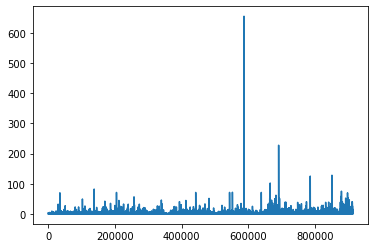

In [7]:
n=W_full.shape[0]
weights = []
for i in range(n):
    for j in range(i,n):
        weights.append(W_full[i,j])
plt.plot(weights)

In [5]:


L,W,D,cutoff = scplot.convertToEpsilonNeighborhoodGraphByPercentile(W_full, .9)

print("Cutoff",cutoff)
#Plot L,D and W
#scplot.plot_matrix(W, "W - Weight Matrix")
#scplot.plot_matrix(D,"D - Degree Matrix")
#scplot.plot_matrix(L,"L - Graph Laplacian (L=D-W)")

Cutoff:  0.45100416525774817
Cutoff 0.45100416525774817


In [8]:
e_val,e_vec = linalg.eigh(L)
zeroCount = 0
for e in e_val:
    if(abs(e)<1e-12):
        zeroCount +=1
print("multiplicity of zero eigenvalue",zeroCount)
k=zeroCount

multiplicity of zero eigenvalue 1


In [9]:
########################
#       Clustering     #
########################

# eigen values and clustering
e_val,e_vec = linalg.eigh(L)

km = KMeans(n_clusters=k).fit(e_vec[:,0:k])
km5 = KMeans(n_clusters=5).fit(e_vec[:,0:5])
km8 = KMeans(n_clusters=8).fit(e_vec[:,0:8])
km9 = KMeans(n_clusters=9).fit(e_vec[:,0:9])
km10 = KMeans(n_clusters=10).fit(e_vec[:,0:10])
#km = KMeans(n_clusters=k).fit(e_vec[:,0:k+4])
#km = KMeans(n_clusters=k).fit(e_vec)

#print("Output of KMeans Clustering")
#display(km.cluster_centers_)
#display(km.labels_)

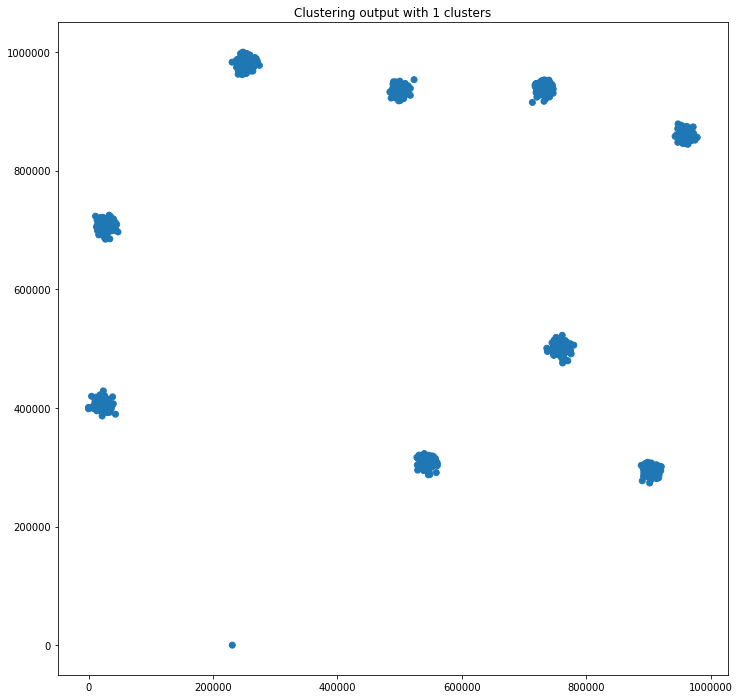

In [10]:
x = []
y=[]
for item in x_list:
    x.append(item[0])
    y.append(item[1])

plt.figure(figsize=(12,12))
plt.scatter(x,y,c=km.labels_, cmap='tab10')
plt.title("Clustering output with "+str(k)+" clusters")
plt.show()
plt.close()

#plt.figure(figsize=(12,12))
#plt.scatter(x,y)
#plt.title("raw data")
#plt.show()
#plt.close()


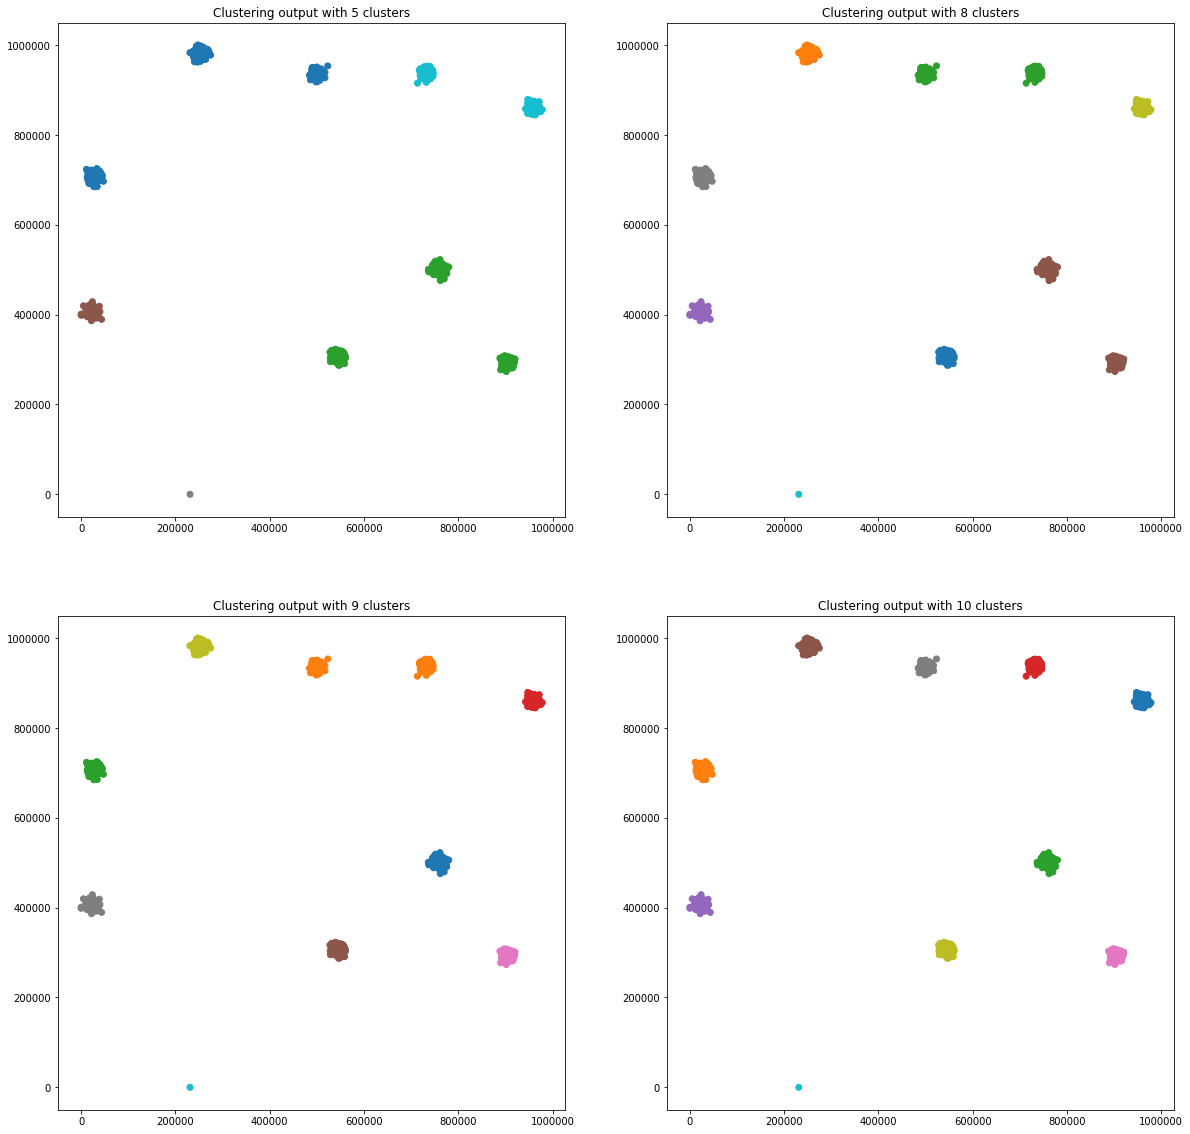

In [11]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

figure = plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.scatter(x,y,c=km5.labels_, cmap='tab10')
plt.title("Clustering output with 5 clusters")

plt.subplot(2,2,2)
plt.scatter(x,y,c=km8.labels_, cmap='tab10')
plt.title("Clustering output with 8 clusters")

plt.subplot(2,2,3)
plt.scatter(x,y,c=km9.labels_, cmap='tab10')
plt.title("Clustering output with 9 clusters")

plt.subplot(2,2,4)
plt.scatter(x,y,c=km10.labels_, cmap='tab10')
plt.title("Clustering output with 10 clusters")
plt.show()
figure.savefig("2DCluster.jpg")
plt.close()


In [ ]:
###########################
# Outputs for Toy Example #
###########################

data_cluster = pd.DataFrame({'Data':x_list, 'Label':km.labels_})
data_cluster_result = data_cluster.groupby('Label').Data.agg(['count','min','max']).reset_index()
data_cluster_result.sort_values('min', inplace=True)

#scplot.plot_histo(x_list)

print("Cluster counts and Ranges:")
display(data_cluster_result)
    
scplot.plot_clusters(x_list,km.labels_,"Clustering output with "+str(k)+" clusters")

Interesting observation:

using the first 'k' eigen vectors is the sweet spot. using more vectors degrades the clustering by causing the clusters to be unbalanced and in extreme cases (e.g. using entire vector) the clustering seems to be wrong where one of 4 clusters overlaps the the union of other 3 